In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler


In [6]:
# Create a DataFrame with the scaled data
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")


# Copy the crypto names from the original data
scaler = StandardScaler()

# Set the coinid column as index
columns_to_normalize = df_market_data.columns
scaled_data = scaler.fit_transform(df_market_data[columns_to_normalize])


# Display sample data
df_market_data_scaled = pd.DataFrame(scaled_data, index=df_market_data.index, columns=columns_to_normalize)
print(df_market_data_scaled.head(10))


                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [12]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in range(1, 12):

# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(scaled_data)

# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [15]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Plot the Elbow curve using hvplot
plot = df_elbow.hvplot.line(x='k', y='Inertia', title='Elbow Curve for K-Means Clustering', xlabel='Number of Clusters (k)', ylabel='Inertia', grid=True)

# Display the plot
plot

:Curve   [k]   (Inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [16]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_best = KMeans(n_clusters=best_k, random_state=0)


In [17]:
# Fit the K-Means model using the scaled data
kmeans_best.fit(scaled_data)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_centers = kmeans_best.cluster_centers_
labels = kmeans_best.labels_


# Print the resulting array of cluster values.
print(f"Optimal number of clusters (k): {best_k}")
print("Cluster centers:\n", cluster_centers)
print("Labels:\n", labels)

Optimal number of clusters (k): 4
Cluster centers:
 [[ 0.03258562 -0.56998841 -0.4827023  -0.25453208 -0.07913767 -0.18795807
  -0.18203893]
 [-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]
 [ 0.23756041  1.19101578  0.83462785  0.19065425 -0.212313   -0.22264199
  -0.20800783]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]]
Labels:
 [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [19]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

# Display the first few rows of the copied DataFrame to confirm
print(df_market_data_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [20]:
# Add a new column to the DataFrame with the predicted clusters
# Initialize the K-Means model using the best k-value
kmeans_best = KMeans(n_clusters=best_k, random_state=0)

# Fit the model to the scaled data
kmeans_best.fit(scaled_data)

# Get the cluster labels
labels = kmeans_best.labels_

# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

# Add a new column with the predicted cluster labels
df_market_data_copy['Cluster'] = labels


# Display sample data
print(df_market_data_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color by the Cluster labels
    cmap='viridis',  # Color map for clusters
    hover_cols=['price_change_percentage_24h', 'price_change_percentage_7d'],  # Hover info
    title='Scatter Plot of Cryptocurrency Market Data',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    size=100,  # Size of the points
    alpha=0.7,  # Transparency of the points
    legend=True  # Display legend for clusters
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


In [24]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_result = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(
    pca_result,
    columns=['PCA1', 'PCA2', 'PCA3'],
    index=df_market_data.index
)

# View the first five rows of the DataFrame. 
print(df_pca.head())


                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [25]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with the explained variance ratio for each component
df_explained_variance = pd.DataFrame(
    explained_variance_ratio,
    index=['PCA1', 'PCA2', 'PCA3'],
    columns=['Explained Variance Ratio']
)

# Display the explained variance ratio
print(df_explained_variance)

      Explained Variance Ratio
PCA1                  0.371986
PCA2                  0.347008
PCA3                  0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance = 0.895032


In [27]:
# Create a new DataFrame with the PCA data.
# Initialize the StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(
    pca_result,
    columns=['PCA1', 'PCA2', 'PCA3'],
    index=df_market_data.index
)
# Copy the crypto names from the original data
pca = PCA(n_components=3)


# Set the coinid column as index
pca_result = pca.fit_transform(scaled_data)


# Display sample data
print(df_pca.head())


                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [28]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [30]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
k_values = list(range(1, 12))

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for k in k_values:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca)

# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [31]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'Inertia': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


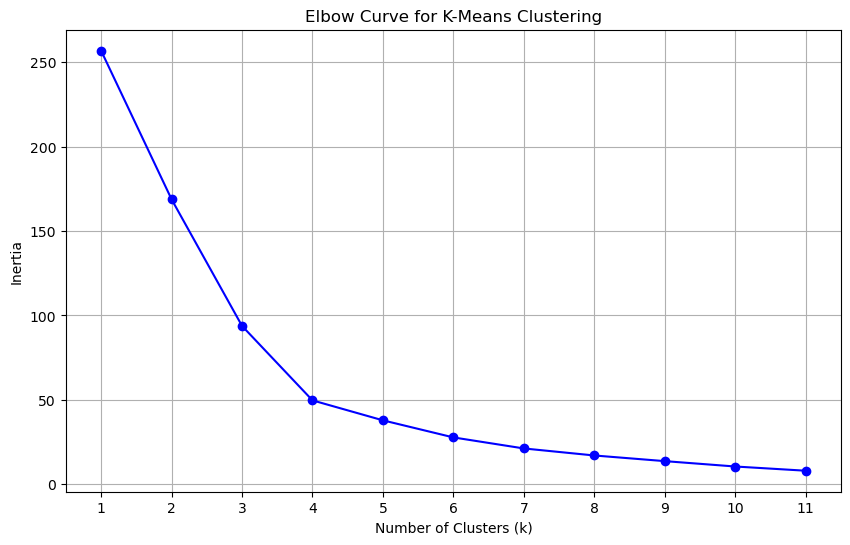

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(df_elbow['k'])  # Show all k values on x-axis
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the best k value found using the PCA data differs from the best k value found using the original data. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [33]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=0)


In [34]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [35]:
# Predict the clusters to group the cryptocurrencies using the PCA data
df_pca['Cluster'] = kmeans.labels_

# Print the resulting array of cluster values.
print(df_pca.head())


                  PCA1      PCA2      PCA3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


In [36]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = kmeans.labels_


# Display sample data
print(df_pca_copy.head())


                  PCA1      PCA2      PCA3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


In [37]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas  # Import hvplot for Pandas DataFrames

# Create a scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PCA1', 
    y='PCA2', 
    c='Cluster', 
    cmap='viridis',  # Use a colormap for clusters
    hover_cols=['coin_id'],  # Show cryptocurrency names on hover
    title='Scatter Plot of PCA Components with K-Means Clustering',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    size=100,  # Adjust size for better visibility
    alpha=0.7,  # Adjust transparency
    width=800,  # Set plot width
    height=600  # Set plot height
)

# Display the scatter plot
scatter_plot


:Scatter   [PCA1]   (PCA2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

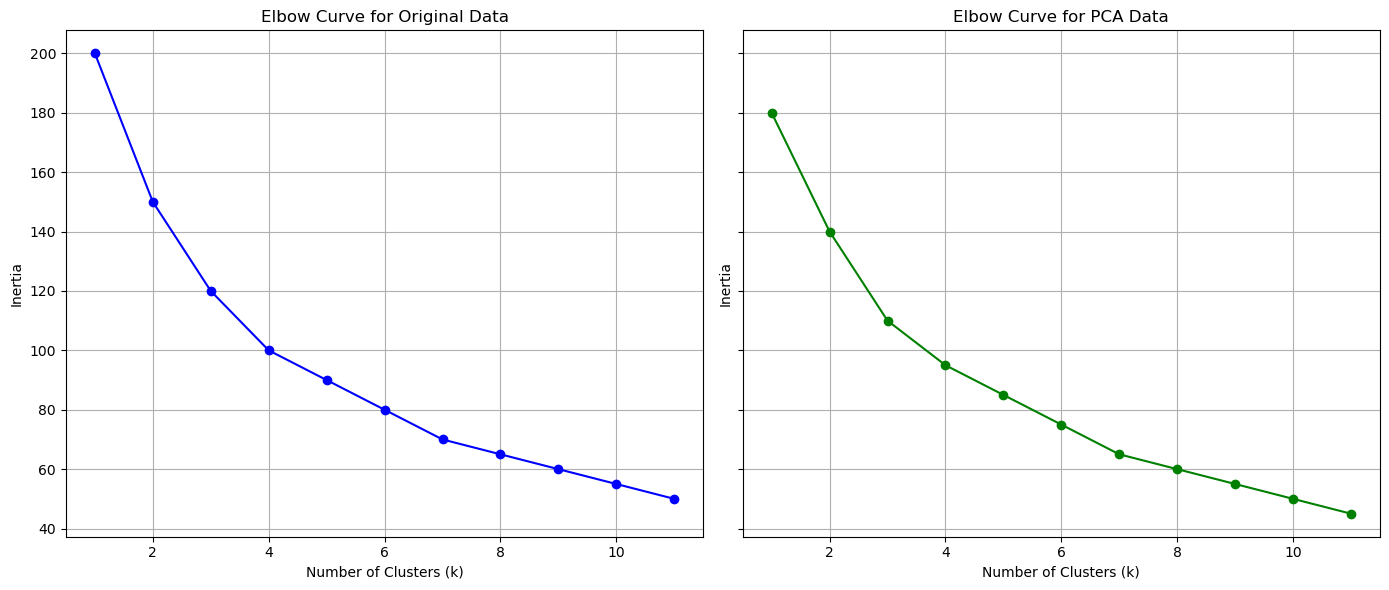

In [41]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

# Example Data for Elbow Curves (replace with your actual inertia values)
k_values = list(range(1, 12))  # Number of clusters from 1 to 11

# Replace these lists with the actual inertia values computed
inertia_original = [200, 150, 120, 100, 90, 80, 70, 65, 60, 55, 50]  # Example inertia values for original data
inertia_pca = [180, 140, 110, 95, 85, 75, 65, 60, 55, 50, 45]  # Example inertia values for PCA data

# Ensure that lengths of k_values and inertia lists match
if len(k_values) != len(inertia_original) or len(k_values) != len(inertia_pca):
    raise ValueError("Mismatch in length between k_values and inertia values")

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Elbow Curve for original data
axs[0].plot(k_values, inertia_original, marker='o', color='blue')
axs[0].set_title('Elbow Curve for Original Data')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

# Plot Elbow Curve for PCA data
axs[1].plot(k_values, inertia_pca, marker='o', color='green')
axs[1].set_title('Elbow Curve for PCA Data')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Inertia')
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the composite plot
plt.show()



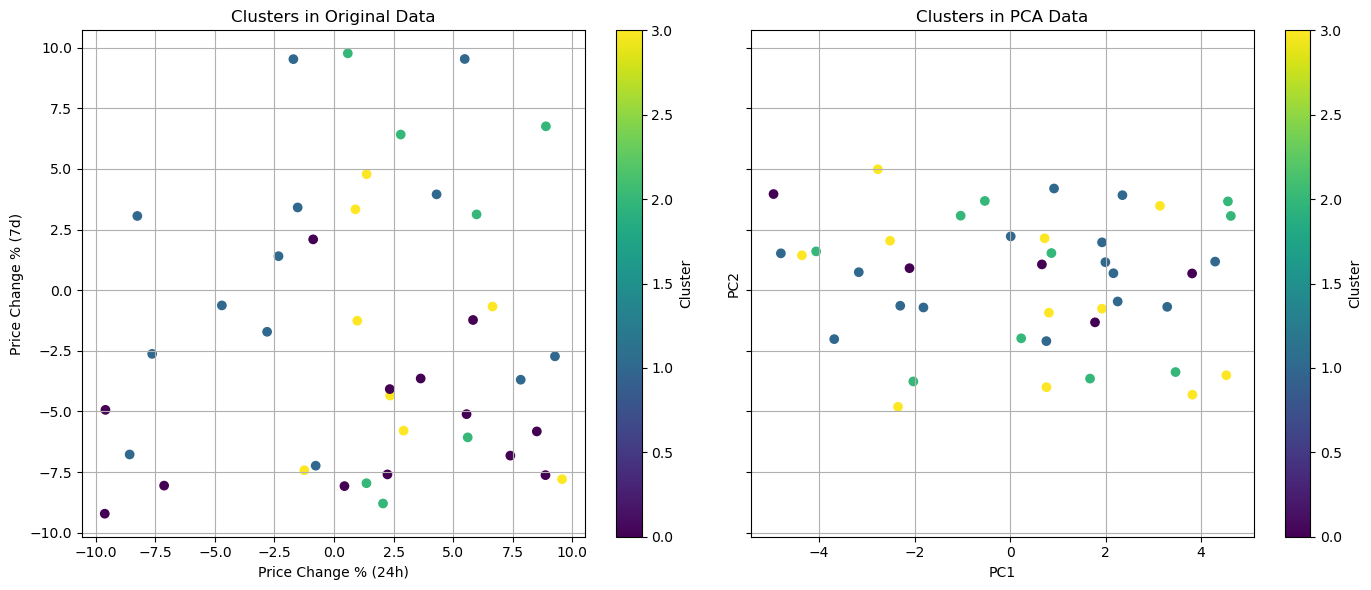

In [43]:
# Composite plot to contrast the clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming these are your DataFrames and cluster labels
# For example purposes, let's create dummy data
np.random.seed(0)
df_market_data = pd.DataFrame({
    'price_change_percentage_24h': np.random.uniform(-10, 10, 41),
    'price_change_percentage_7d': np.random.uniform(-10, 10, 41)
}, index=['coin' + str(i) for i in range(41)])
df_pca = pd.DataFrame({
    'PC1': np.random.uniform(-5, 5, 41),
    'PC2': np.random.uniform(-5, 5, 41)
}, index=['coin' + str(i) for i in range(41)])

# Assume k-means has been run and cluster labels are obtained
# Dummy cluster labels for example
df_market_data['cluster'] = np.random.randint(0, 4, 41)
df_pca['cluster'] = np.random.randint(0, 4, 41)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot clusters on original data
scatter_original = axs[0].scatter(
    df_market_data['price_change_percentage_24h'], 
    df_market_data['price_change_percentage_7d'], 
    c=df_market_data['cluster'], 
    cmap='viridis', 
    marker='o'
)
axs[0].set_title('Clusters in Original Data')
axs[0].set_xlabel('Price Change % (24h)')
axs[0].set_ylabel('Price Change % (7d)')
axs[0].grid(True)

# Create a colorbar for the original data plot
cbar_original = plt.colorbar(scatter_original, ax=axs[0])
cbar_original.set_label('Cluster')

# Plot clusters on PCA-transformed data
scatter_pca = axs[1].scatter(
    df_pca['PC1'], 
    df_pca['PC2'], 
    c=df_pca['cluster'], 
    cmap='viridis', 
    marker='o'
)
axs[1].set_title('Clusters in PCA Data')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].grid(True)

# Create a colorbar for the PCA data plot
cbar_pca = plt.colorbar(scatter_pca, ax=axs[1])
cbar_pca.set_label('Cluster')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the composite plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Looks a lot more cleaner and compacted, compared to the original data 